In [1]:
from google.colab import files

uploaded = files.upload()


Saving Elon_musk.csv to Elon_musk.csv


I've been using these wireless earbuds for a few weeks now, and I must say, I'm impressed! The sound quality is fantastic, with crisp highs and deep bass. They fit snugly in my ears and are comfortable to wear for extended periods. The battery life is excellent, lasting me through long commutes and workouts without needing to recharge. Overall, highly recommended!
These wireless earbuds are amazing! I love the sleek design and how comfortable they are to wear. The sound quality is top-notch, and they stay connected to my devices without any issues. The battery life is impressive, lasting me through my entire workday. Definitely worth the investment!
I purchased these wireless earbuds for running, and they have exceeded my expectations! They stay in place during my workouts, and the sound quality is fantastic, keeping me motivated with my favorite tunes. The battery life is excellent, lasting me through multiple runs without needing a recharge. Highly recommended for active lifestyles!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


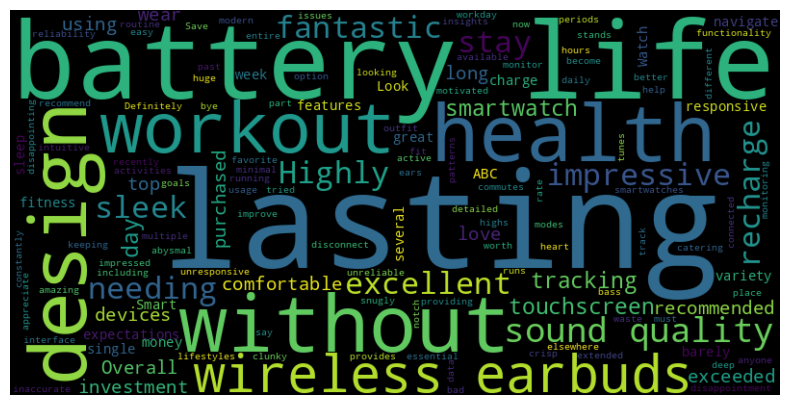

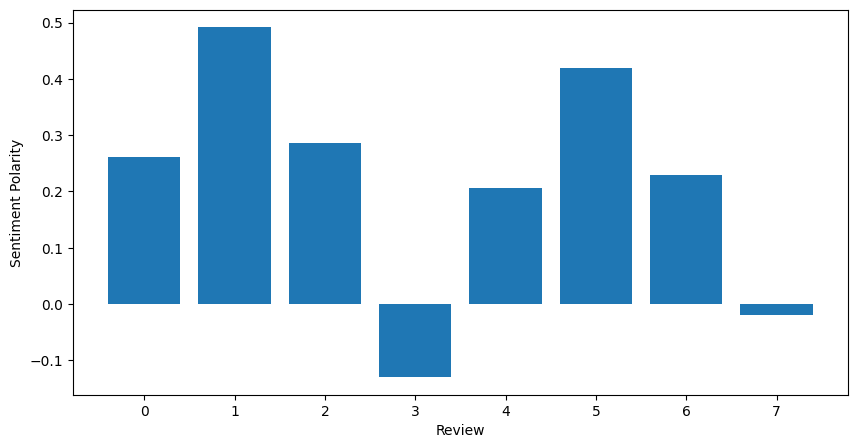

[]


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


['The quick', 'The quick brown', 'The quick brown fox', 'The quick brown fox jumps', 'The quick brown fox jumps over', 'The quick brown fox jumps over the', 'The quick brown fox jumps over the lazy', 'The quick brown fox jumps over the lazy dog', 'quick brown', 'quick brown fox', 'quick brown fox jumps', 'quick brown fox jumps over', 'quick brown fox jumps over the', 'quick brown fox jumps over the lazy', 'quick brown fox jumps over the lazy dog', 'brown fox', 'brown fox jumps', 'brown fox jumps over', 'brown fox jumps over the', 'brown fox jumps over the lazy', 'brown fox jumps over the lazy dog', 'fox jumps', 'fox jumps over', 'fox jumps over the', 'fox jumps over the lazy', 'fox jumps over the lazy dog', 'jumps over', 'jumps over the', 'jumps over the lazy', 'jumps over the lazy dog', 'over the', 'over the lazy', 'over the lazy dog', 'the lazy', 'the lazy dog', 'lazy dog']
['The quick', 'The quick brown', 'The quick brown fox', 'The quick brown fox jumps', 'The quick brown fox jumps

In [25]:

reviews = {
    "XYZ Wireless Earbuds": [
        "I've been using these wireless earbuds for a few weeks now, and I must say, I'm impressed! The sound quality is fantastic, with crisp highs and deep bass. They fit snugly in my ears and are comfortable to wear for extended periods. The battery life is excellent, lasting me through long commutes and workouts without needing to recharge. Overall, highly recommended!",

        "These wireless earbuds are amazing! I love the sleek design and how comfortable they are to wear. The sound quality is top-notch, and they stay connected to my devices without any issues. The battery life is impressive, lasting me through my entire workday. Definitely worth the investment!",

        "I purchased these wireless earbuds for running, and they have exceeded my expectations! They stay in place during my workouts, and the sound quality is fantastic, keeping me motivated with my favorite tunes. The battery life is excellent, lasting me through multiple runs without needing a recharge. Highly recommended for active lifestyles!",

        "These wireless earbuds are a huge disappointment. The sound quality is very bad, and they constantly disconnect from my devices. The battery life is abysmal, barely lasting a few hours. Save your money and don't bye this."
    ],

    "ABC Smart Watch": [
        "I recently purchased the ABC Smart Watch, and it has exceeded my expectations. The design is sleek and modern, and the touchscreen is responsive and easy to navigate. I love the variety of health tracking features, including heart rate monitoring and sleep tracking. The battery life is impressive, lasting me several days on a single charge. It's become an essential part of my daily routine!",

        "This smartwatch is fantastic! I've been using it to track my workouts and monitor my sleep patterns, and it provides detailed insights that help me stay on top of my health goals. The battery life is excellent, lasting me through long days without needing to recharge. The sleek design looks great with any outfit. Highly recommend!",

        "I've tried several smartwatches in the past, but the ABC Smart Watch stands out for its reliability and functionality. The touchscreen is responsive, and the interface is intuitive to navigate. I appreciate the variety of workout modes available, catering to different fitness activities. The battery life is impressive, lasting me over a week on a single charge. Overall, a great investment for anyone looking to improve their health and fitness!",

        "Do not waste your money on this smartwatch. The design is clunky, and the touchscreen is unresponsive. The health tracking features are inaccurate, providing unreliable data. The battery life is disappointing, barely lasting a day with minimal usage. Look elsewhere for a better smartwatch option."
    ]
}

review_list = []
for product, product_reviews  in reviews.items():

  for i in  range(len(product_reviews)):
    print(product_reviews[i])
    review_list.append(product_reviews[i])

review_list

#To remove punctuation and make all text into lower case
import string
review_without_punctuation = []

for i in range(len(review_list)):
  no_punc_text = review_list[1].translate(str.maketrans('','',string.punctuation))
  no_punc_text_lower = no_punc_text.lower()
  review_without_punctuation.append(no_punc_text_lower)
review_without_punctuation

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

review_without_stopwords_all = []
for review in review_without_punctuation:
  without_stopwords = [word for word in review.split() if word not in stop_words]
  review_without_stopwords_all.append(without_stopwords)
review_without_stopwords_all

# stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = []
for review in review_without_stopwords_all:
  stemmed_review.append([stemmer.stem(word) for word in review])
stemmed_review

from collections import Counter
word_counter_list = []
for review in stemmed_review:
  word_counter = Counter(review)
  word_counter_list.append(word_counter)
word_counter_list

from textblob import TextBlob

emotion_list = []

for review in review_list:
  blob = TextBlob(review)
  emotion_list.append(blob.sentiment.polarity)

print(emotion_list)

positive_reviews = [review for review, emotion in zip(review_list, emotion_list) if emotion > 0]
negative_reviews = [review for review, emotion in zip(review_list, emotion_list) if emotion < 0]
neutral_reviews = [review for review, emotion in zip(review_list, emotion_list) if emotion == 0]

print("Positive Reviews:")
for review in positive_reviews:
  print(review)

print("\nNegative Reviews:")
for review in negative_reviews:
  print(review)

print("\nNeutral Reviews:")
for review in neutral_reviews:
  print(review)

import matplotlib.pyplot as plt
# Word Cloud Visualization

from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = " ".join(review_list)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

from textblob import TextBlob

# Calculate the sentiment polarity for each review
sentiment_polarity = []
for review in review_list:
  blob = TextBlob(review)
  sentiment_polarity.append(blob.sentiment.polarity)

# Plot the sentiment polarity for each review
plt.figure(figsize=(10, 5))
plt.bar(range(len(review_list)), sentiment_polarity)
plt.xlabel("Review")
plt.ylabel("Sentiment Polarity")
plt.show()

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text
text = "The quick brown fox jumps over the lazy dog"
doc = nlp(text)

# Perform named entity recognition
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)

# Display the entities in a graphical format
displacy.render(doc, style="ent")

# Find sequences of phonemes using n-grams and bi-grams
phoneme_sequences = []
for i in range(len(doc)):
  for j in range(i+1, len(doc)):
    phoneme_sequences.append(" ".join([token.text for token in doc[i:j+1]]))

# Print the phoneme sequences
print(phoneme_sequences)

phoneme_sequences = []
for i in range(len(doc)):
  for j in range(i+1, len(doc)):
    phoneme_sequences.append(" ".join([token.text for token in doc[i:j+1]]))

# Print the phoneme sequences
print(phoneme_sequences)

# Find bi-grams and tri-grams
bigrams = []
trigrams = []
for i in range(len(phoneme_sequences)):
  if len(phoneme_sequences[i].split()) == 2:
    bigrams.append(phoneme_sequences[i])
  elif len(phoneme_sequences[i].split()) == 3:
    trigrams.append(phoneme_sequences[i])

# Print the bi-grams and tri-grams
print("Bi-grams:")
print(bigrams)
print("\nTri-grams:")
print(trigrams)

In [27]:

def generate_ngrams(text, n):
  tokens = text.split()
  ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
  return ngrams

# Generate bi-grams and tri-grams for all reviews
bigrams_all = []
trigrams_all = []
for review in review_list:
  bigrams_review = generate_ngrams(review, 2)
  trigrams_review = generate_ngrams(review, 3)
  bigrams_all.extend(bigrams_review)
  trigrams_all.extend(trigrams_review)

# Count the frequency of each n-gram
bigram_counts = Counter(bigrams_all)
trigram_counts = Counter(trigrams_all)

# Print the most frequent n-grams
print("Most frequent bi-grams:")
for bigram, count in bigram_counts.most_common(5):
  print(f"{bigram}: {count}")

print("\nMost frequent tri-grams:")
for trigram, count in trigram_counts.most_common(5):
  print(f"{trigram}: {count}")


Most frequent bi-grams:
('The', 'battery'): 8
('battery', 'life'): 8
('life', 'is'): 8
('lasting', 'me'): 6
('wireless', 'earbuds'): 4

Most frequent tri-grams:
('The', 'battery', 'life'): 8
('battery', 'life', 'is'): 8
('sound', 'quality', 'is'): 4
('lasting', 'me', 'through'): 4
('The', 'sound', 'quality'): 3


In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the reviews
vectorized_reviews = vectorizer.fit_transform(review_list)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the shape of the vectorized reviews
print(vectorized_reviews.shape)

# Access the TF-IDF values for a specific review
review_index = 0
tfidf_values = vectorized_reviews[review_index].toarray()[0]

# Create a dictionary of TF-IDF values for the review
tfidf_dict = dict(zip(feature_names, tfidf_values))

# Print the TF-IDF values for the review
for word, tfidf in tfidf_dict.items():
  if tfidf > 0:
    print(f"{word}: {tfidf}")

# Find the most similar reviews using TF-IDF similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between all pairs of reviews
cosine_similarity_matrix = cosine_similarity(vectorized_reviews)

# Find the indices of the most similar reviews for a given review
review_index = 0
most_similar_indices = cosine_similarity_matrix[review_index].argsort()[-5:-1]

# Print the most similar reviews
for index in most_similar_indices:
  print(f"Review {index+1}: {review_list[index]}")



(8, 188)
and: 0.26441230613075417
are: 0.10495758342760707
bass: 0.16552721980287755
battery: 0.06610307653268854
been: 0.13872472873026873
comfortable: 0.13872472873026873
commutes: 0.16552721980287755
crisp: 0.16552721980287755
deep: 0.16552721980287755
earbuds: 0.10495758342760707
ears: 0.16552721980287755
excellent: 0.11970805867790618
extended: 0.16552721980287755
fantastic: 0.11970805867790618
few: 0.13872472873026873
fit: 0.16552721980287755
for: 0.20991516685521414
highly: 0.11970805867790618
highs: 0.16552721980287755
impressed: 0.16552721980287755
in: 0.11970805867790618
is: 0.13220615306537709
lasting: 0.06610307653268854
life: 0.06610307653268854
long: 0.13872472873026873
me: 0.08271573341911014
must: 0.16552721980287755
my: 0.08271573341911014
needing: 0.11970805867790618
now: 0.16552721980287755
overall: 0.13872472873026873
periods: 0.16552721980287755
quality: 0.10495758342760707
recharge: 0.11970805867790618
recommended: 0.13872472873026873
say: 0.16552721980287755
snug